# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

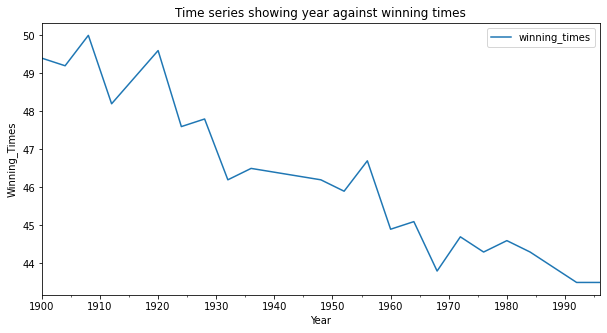

In [3]:
# Plot the time series
data.plot(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Winning_Times")
plt.title("Time series showing year against winning times");

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

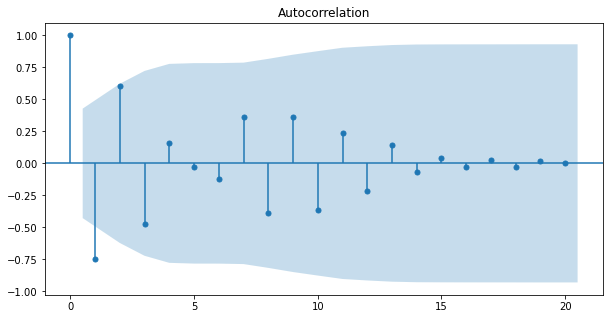

In [5]:
# Plot the ACF
# importing required library
from statsmodels.graphics.tsaplots import plot_acf

# plotting
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(data_diff, ax=ax, lags= 20);


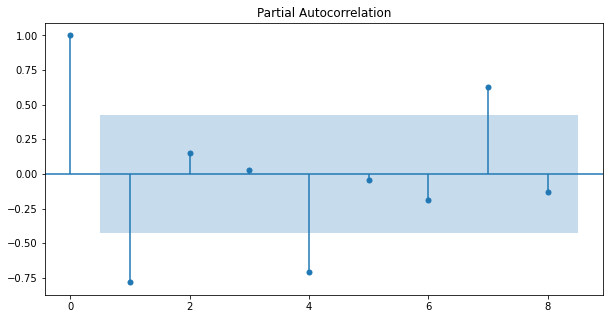

In [6]:
# Plot the PACF
# importing required library
from statsmodels.graphics.tsaplots import plot_pacf

#plotting
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(data_diff, ax=ax, lags= 8 );

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
# Importing required library
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [8]:
# Instantiating and fitting model
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit();

# Summary on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 28 Aug 2022   AIC                             46.107
Time:                        17:25:28   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [9]:
# instatiating and fitting the model
mod_arma = ARMA(data_diff, order=(0,1))
res_arma = mod_arma.fit();

# Summary on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Sun, 28 Aug 2022   AIC                             51.308
Time:                        17:25:28   BIC                             54.442
Sample:                    12-31-1904   HQIC                            51.988
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                

C:\Users\ADMIN\anaconda3\An4\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [10]:
# instatiating and fitting model
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit();

# Summary on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Sun, 28 Aug 2022   AIC                             44.943
Time:                        17:25:29   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.005      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

In [11]:
# instatiating and fitting model
mod_arma = ARMA(data_diff, order=(0,3))
res_arma = mod_arma.fit();

# Summary on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 3)   Log Likelihood                 -16.471
Method:                       css-mle   S.D. of innovations              0.452
Date:                Sun, 28 Aug 2022   AIC                             42.942
Time:                        17:25:29   BIC                             48.165
Sample:                    12-31-1904   HQIC                            44.076
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3071      0.028    -11.046      0.000      -0.362      -0.253
ma.L1.winning_times    -0.9454      0.219     -4.307      0.000      -1.376      -0.515
ma.L2.winning_ti

C:\Users\ADMIN\anaconda3\An4\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## What is your final model? Why did you pick this model?

In [12]:
# Your comments here

# ARMA(0,3) is my final model because it has the smallest AIC and BIC.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 